In [373]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)


pd.options.mode.chained_assignment = None 

In [374]:
scores = pd.read_csv('data\scores.csv')

In [375]:
scores

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0
5,condition_6,7,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0
6,condition_7,11,1,20-24,1.0,NaN,2.0,11-15,2.0,1.0,24.0,25.0
7,condition_8,5,2,25-29,2.0,NaN,2.0,11-15,1.0,2.0,20.0,16.0
8,condition_9,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0
9,condition_10,9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0


In [376]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   number     55 non-null     object 
 1   days       55 non-null     int64  
 2   gender     55 non-null     int64  
 3   age        55 non-null     object 
 4   afftype    23 non-null     float64
 5   melanch    20 non-null     float64
 6   inpatient  23 non-null     float64
 7   edu        53 non-null     object 
 8   marriage   23 non-null     float64
 9   work       23 non-null     float64
 10  madrs1     23 non-null     float64
 11  madrs2     23 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 5.3+ KB


In [377]:
scores.isnull().sum()

number        0
days          0
gender        0
age           0
afftype      32
melanch      35
inpatient    32
edu           2
marriage     32
work         32
madrs1       32
madrs2       32
dtype: int64

# Analyzing the Dataset

When we inspect the dataset we saw that it splits into 2 groups which are condition and control. In condition group we know patient id, number of days of measurement, gender(1 or 2 for female or male), age (age in age groups), afftype (1: bipolar II, 2: unipolar depressive, 3: bipolar I), melanch (1: melancholia, 2: no melancholia), inpatient (1: inpatient, 2: outpatient), edu (education grouped in years), marriage (1: married or cohabiting, 2: single), work (1: working or studying, 2: unemployed/sick leave/pension), madrs1 (MADRS score when measurement started), madrs2 (MADRS when measurement stopped). Also,  for each patient we have a csv file which contains actigraph data collected over time. In these csv files we have timestamp (one minute intervals), date (date of measurement), activity (activity measurement from the actigraph watch). We are asked to train a model for condition group with using attributes provided in scores.csv and measured actigraph data and predict patients depression status in control group.


## Understanding the terminology

While we analyze the dataset it is important to have knowladge about its domain. We are asked to predict patients depression status in control group. When we inspect condition group we saw that, depression status were showed in afftype column. Those are bipolar disorders I,II and unipolar depression.<br>
### Bipolar disorders 
Bipolar disorders divides into 2 group, bipolar disorder I and bipolar disorder II. All types of bipolar disorder are characterized by episodes of extreme mood. The highs are known as manic episodes. The lows are known as depressive episodes.
The main difference between bipolar 1 and bipolar 2 disorders lies in the severity of the manic episodes caused by each type.
A person with bipolar 1 will experience a full manic episode, while a person with bipolar 2 will experience only a hypomanic episode (a period that’s less severe than a full manic episode). A person with bipolar 1 may or may not experience a major depressive episode, while a person with bipolar 2 will experience a major depressive episode <a href="https://www.healthline.com/health/bipolar-disorder/bipolar-1-vs-bipolar-2#bipolar-vs-bipolar-">[1]</a>.
### Unipolar Depression
Unipolar depression is a very serious and common mood disorder. Individuals that are affected by this form of depression experience continuous feelings of sadness, or lack of interest in interacting with the world around them. Depressed mood can last the entire day, and persist for longer-periods (longer than 2 weeks) <a href="https://guides.clarahealth.com/what-is-unipolar-depression/">[2]</a>.
### Montgomery–Åsberg Depression Rating Scale (MADRS)
MADRS diagnostic questionnaire which psychiatrists use to measure the severity of depressive episodes in patients with mood disorders. It was designed in 1979 by British and Swedish researchers <a href="https://en.wikipedia.org/wiki/Montgomery%E2%80%93%C3%85sberg_Depression_Rating_Scale">[3]</a>.
#### Interpretation
Higher MADRS score indicates more severe depression, and each item yields a score of 0 to 6. The overall score ranges from 0 to 60. The questionnaire includes questions on the following symptoms 1. Apparent sadness 2. Reported sadness 3. Inner tension 4. Reduced sleep 5. Reduced appetite 6. Concentration difficulties 7. Lassitude 8. Inability to feel 9. Pessimistic thoughts 10. Suicidal thoughts.<br>

Usual cutoff points are:<br>

- __0 to 6__ &emsp;&nbsp;–->&ensp;normal /symptom absent
- __7 to 19__&ensp;&ensp;–->&ensp;mild depression
- __20 to 34__&nbsp;&nbsp;–->&ensp;moderate depression
- __34 to 60__&nbsp;&nbsp;–->&ensp;severe depression

# Time Series Analysis

Time series analyzes are generally used for forecasting. Since we are trying to classify patients' depression status we do not need to apply time series analysis. However, we applied it to evaluate the relationship between the arrival times of the data and suspicious activities.

In [378]:
# Reading csv files in condition folder
import glob
files = glob.glob("data\condition\*.csv")
df = []
for f in files:
    csv = pd.read_csv(f)
    df.append(csv)


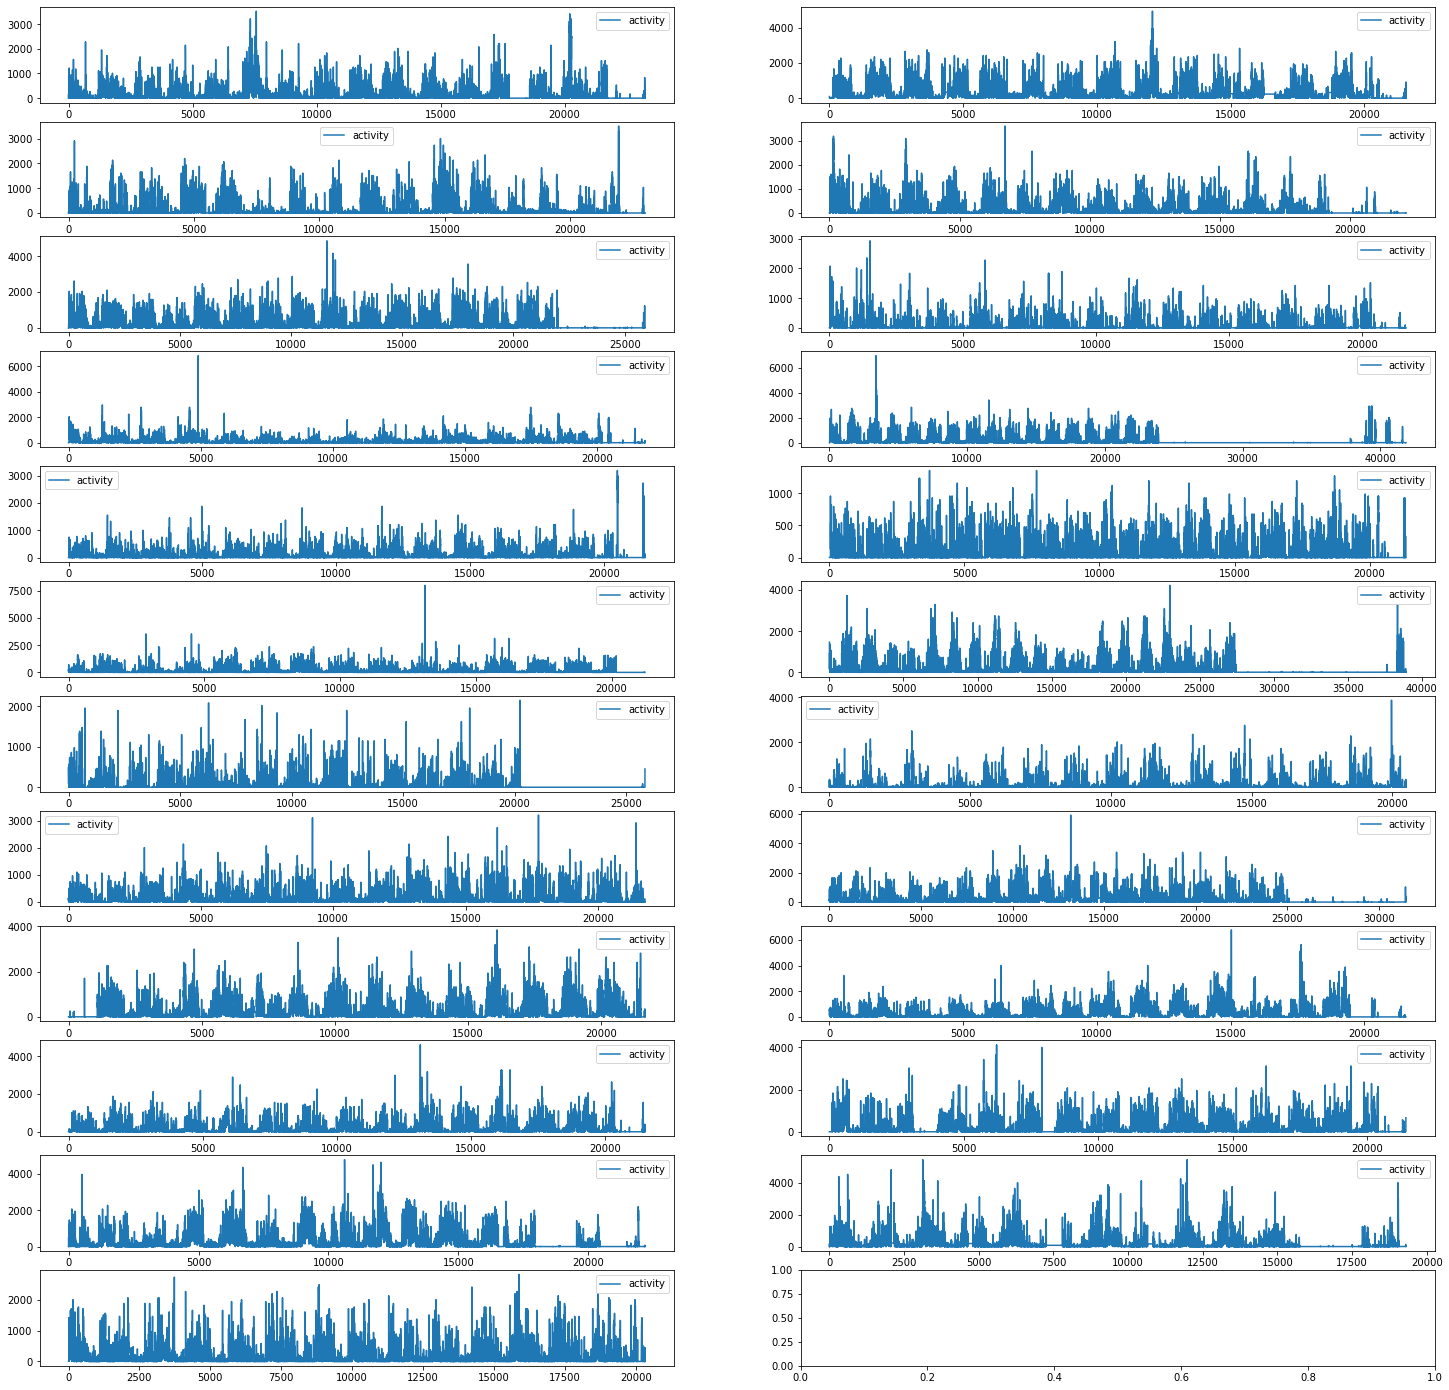

In [379]:
fig, axes = plt.subplots(nrows=12, ncols=2, figsize=(25, 25))
# Plotting every patients' activity measurement from the actigraph watch

i = 0
j = 0
for frame in df:
    frame.plot(ax = axes[i, j])
    j +=1
    if j == 2:
        j = 0
        i +=1   
    if i == len(df) - 1:
        break

In [380]:
new_dfs = []
for i in range(len(df)):
    curr_frame = df[i]
    times = pd.to_datetime(curr_frame['timestamp'])
    new_dfs.append(curr_frame.groupby([curr_frame.date, times.dt.hour]).activity.sum())


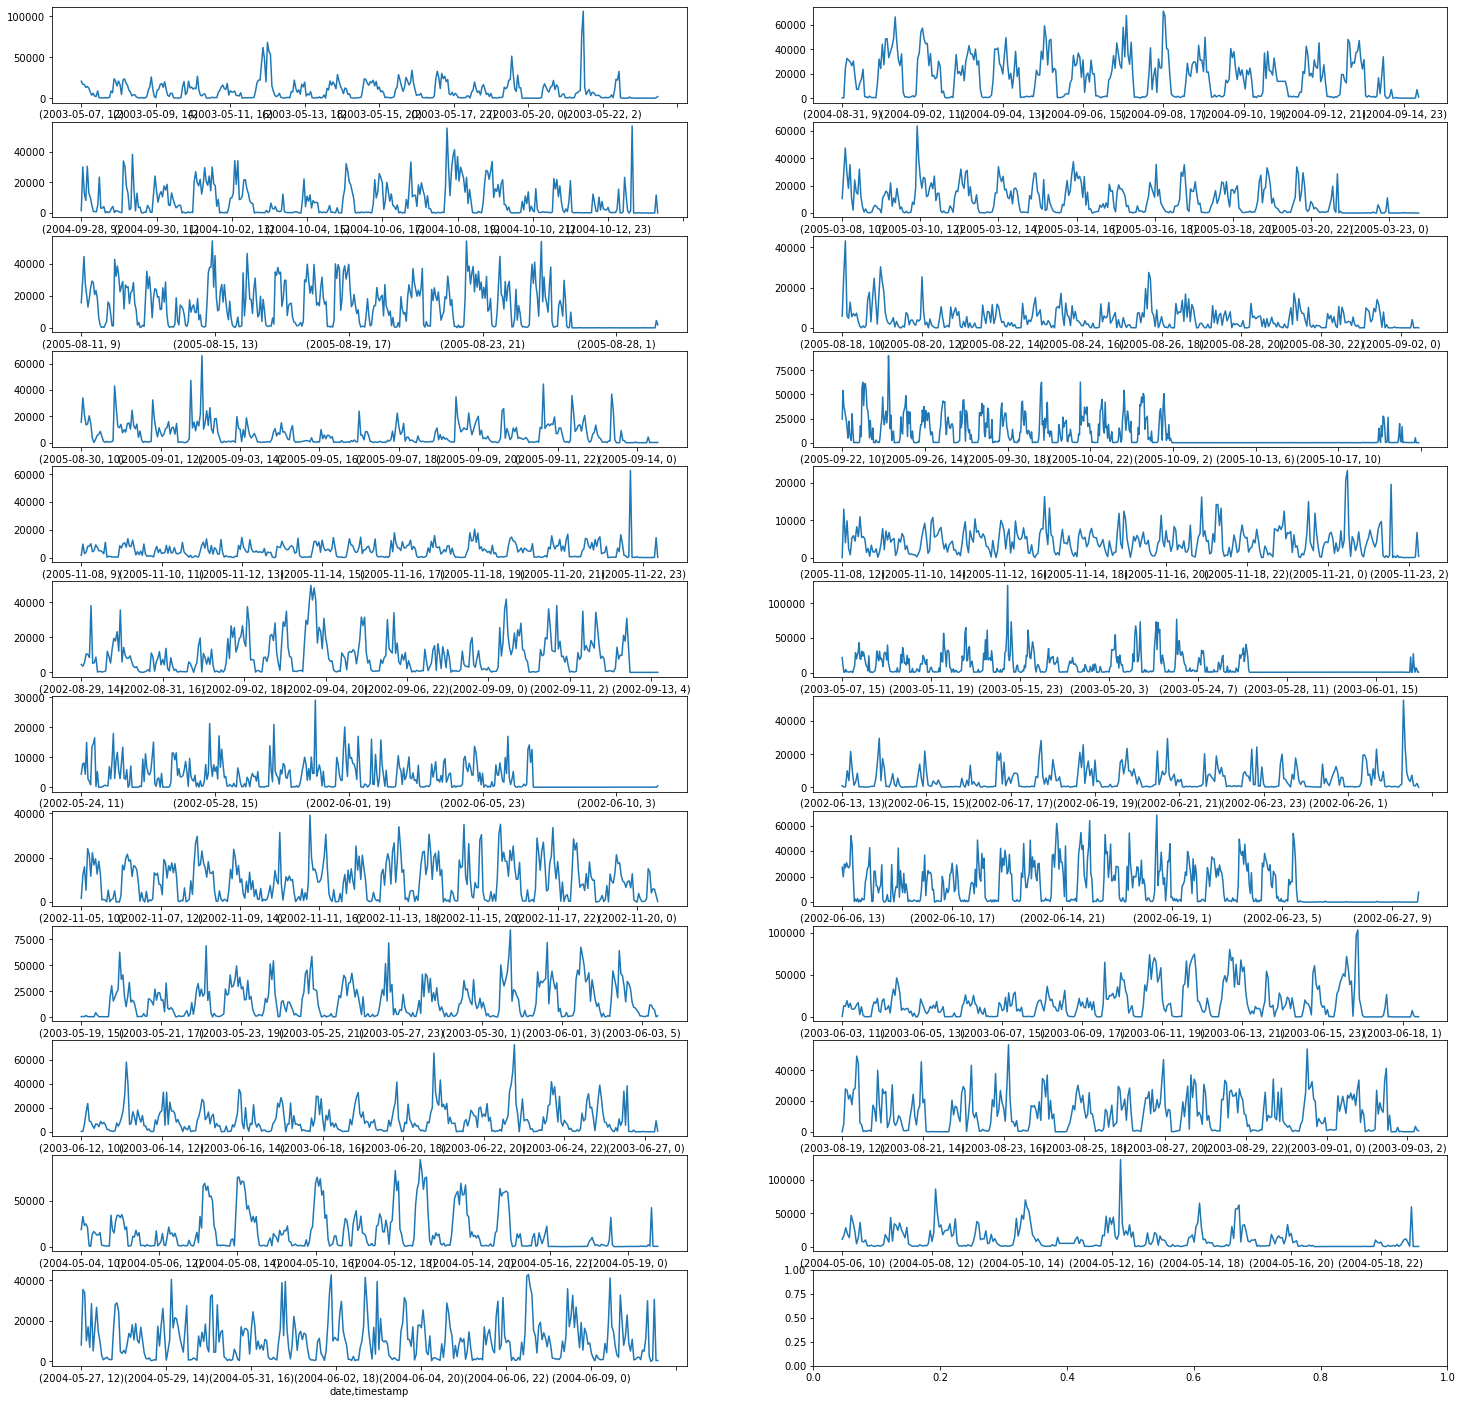

In [381]:
fig, axes = plt.subplots(nrows=12, ncols=2, figsize=(25, 25))
# Plotting every patients' activity measurement from the actigraph watch

i = 0
j = 0
for frame in new_dfs:
    frame.plot(ax = axes[i, j])
    j +=1
    if j == 2:
        j = 0
        i +=1   
    if i == len(df) - 1:
        break

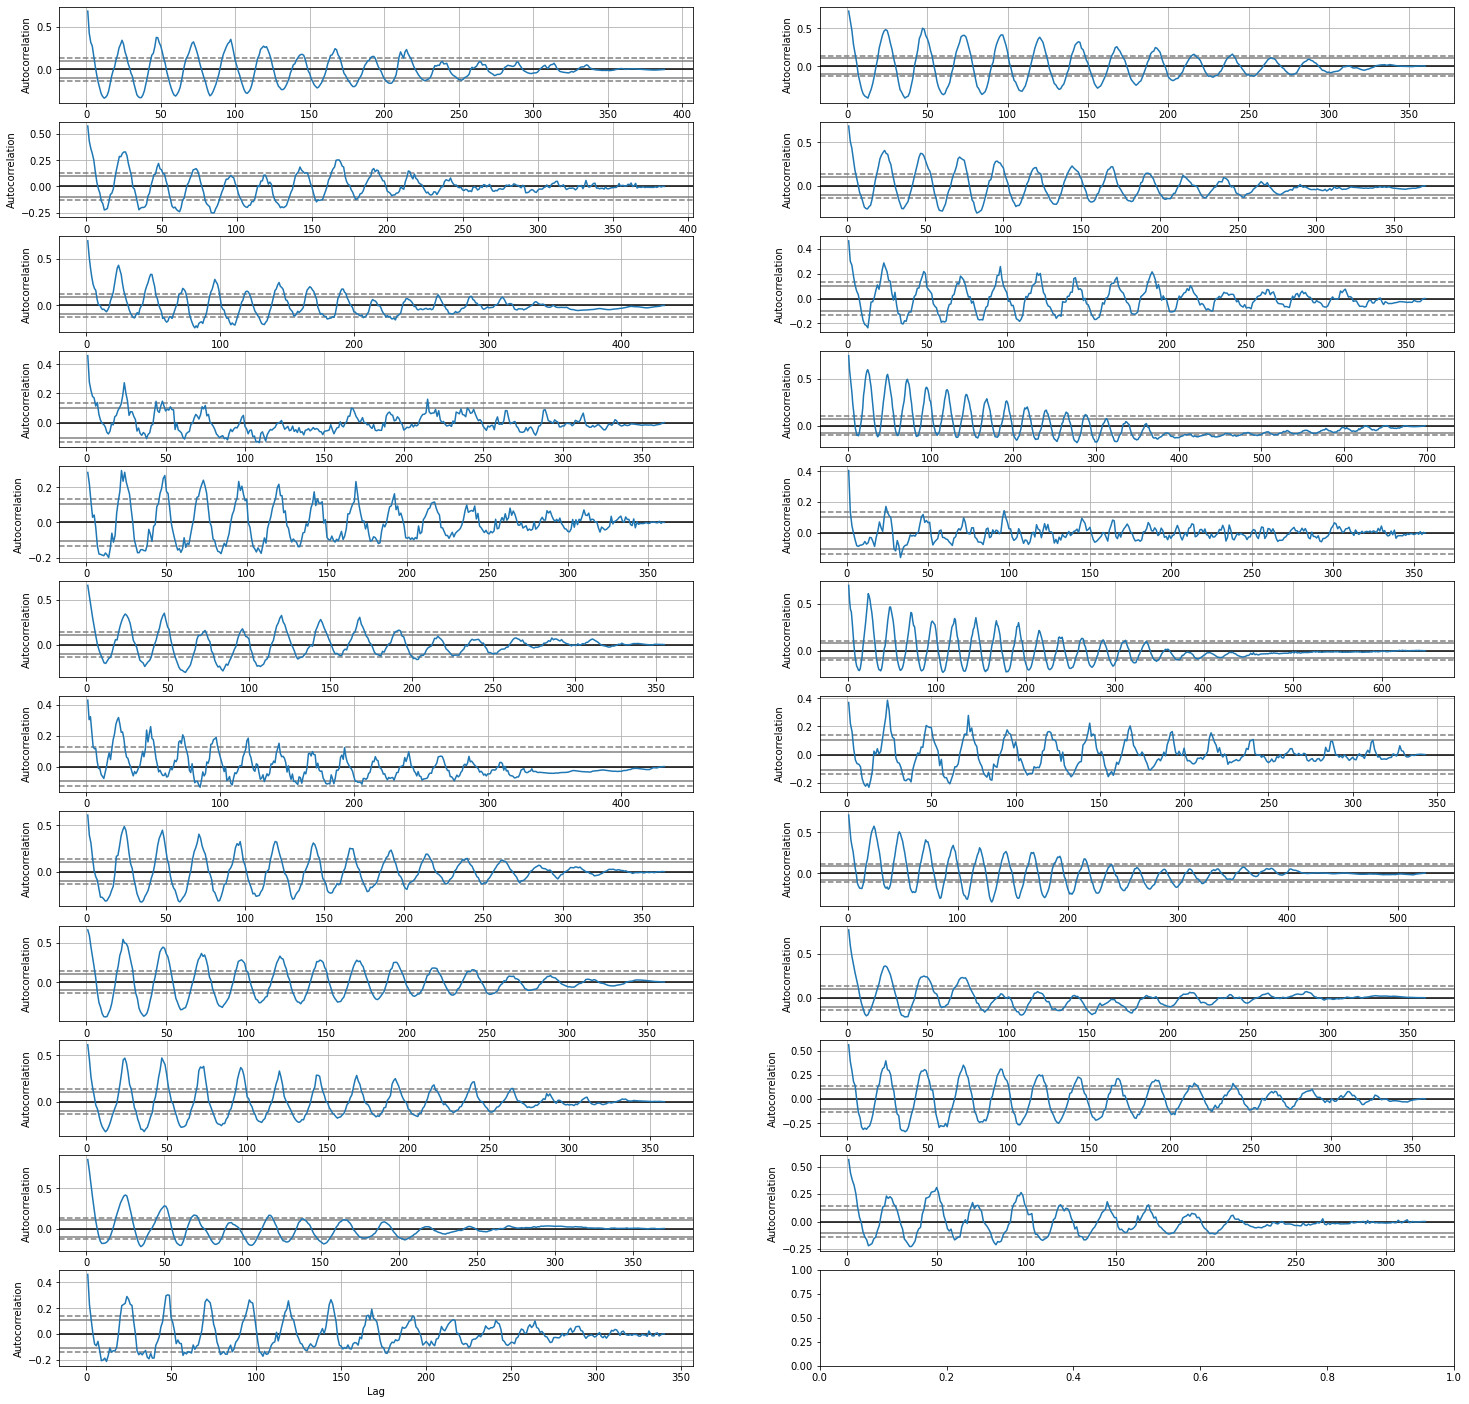

In [382]:
fig, axes = plt.subplots(nrows=12, ncols=2, figsize=(25,25))
# Plotting every patients' activity measurement from the actigraph watch

i = 0
j = 0
for frame in new_dfs:
    pd.plotting.autocorrelation_plot(frame, ax = axes[i, j])
    j +=1
    if j == 2:
        j = 0
        i +=1   
    if i == len(df) - 1:
        break


# Augmented Dickey-Fuller Test

A time series is said to be “stationary” if it has no trend, exhibits constant variance over time, and has a constant autocorrelation structure over time.

One way to test whether a time series is stationary is to perform an augmented Dickey-Fuller test, which uses the following null and alternative hypotheses:

H0: The time series is non-stationary. In other words, it has some time-dependent structure and does not have constant variance over time.

HA: The time series is stationary.

If the p-value from the test is less than some significance level (e.g. α = .05), then we can reject the null hypothesis and conclude that the time series is stationary <a href="https://www.statology.org/dickey-fuller-test-python/">[4]</a>

In [383]:
from statsmodels.tsa.stattools import adfuller

#perform augmented Dickey-Fuller test
threshold = 0.05
index = 0
for frame in new_dfs:
    index += 1
    test = adfuller(frame)
    if test[1] < threshold:
        print(f"Reject null hypothesis patient {index} has stationary measurement activities, p-value: {test[1]} \n")
    else:
        print(f"Fail to reject null hypothesis patient {index} has non-stationary measurement activities, p-value: {test[1]} \n")
        

Reject null hypothesis patient 1 has stationary measurement activities, p-value: 2.101333315110832e-11 

Reject null hypothesis patient 2 has stationary measurement activities, p-value: 2.4850711715420292e-11 

Reject null hypothesis patient 3 has stationary measurement activities, p-value: 1.802859411396618e-08 

Reject null hypothesis patient 4 has stationary measurement activities, p-value: 1.8213154900207533e-08 

Reject null hypothesis patient 5 has stationary measurement activities, p-value: 8.780941620537546e-11 

Reject null hypothesis patient 6 has stationary measurement activities, p-value: 9.39200979862736e-10 

Reject null hypothesis patient 7 has stationary measurement activities, p-value: 1.7604448387959554e-11 

Fail to reject null hypothesis patient 8 has non-stationary measurement activities, p-value: 0.25322834171032327 

Reject null hypothesis patient 9 has stationary measurement activities, p-value: 3.521234934392924e-14 

Reject null hypothesis patient 10 has stati

__We can drop the data of patients with non-stationary measurements because the occurrence of suspicious activity is not associated with a specific time interval. So, we cannot be sure of the accuracy of their activity measurements. Actigraph watch may not work properly, and in this case not including their data improves the quality of our model.__


In [384]:
df = np.delete(df, (15), axis=0) # deleting element in the 16th index

In [385]:
df = np.delete(df, (11), axis=0) # deleting element in the 12th index

In [386]:
df = np.delete(df, (7), axis=0) # deleting element in the 7th index

In [387]:
len(df)

20

# Preparing data

Since rest of the measurements is stationary we can reduce the time effect in data set, we will take the mean of activities for each patient and create new attribute in scores table. For that we will split scores table into condition and control tables. Then we will remove patients with non-reliable measurements from condition table. After that we will merge madrs1 and madrs2 scores and delete some attributes. Finally we will deal with categorical attributes.

In [388]:
condition = scores.iloc[:23, :]
control = scores.iloc[23:, :]

In [389]:
condition.drop(condition.index[[7, 11, 15]],  inplace = True)

In [390]:
condition['mean_activity'] = [i['activity'].mean() for i in df]

In [391]:
# Reading csv files in control folder
import glob
files = glob.glob("data\control\*.csv")
con = []
for f in files:
    csv = pd.read_csv(f)
    con.append(csv)

In [392]:
control['mean_activity'] = [i['activity'].mean() for i in con]

In [393]:
condition['madrs_mean'] = (condition['madrs1'] + condition['madrs2']) / 2

In [394]:
control['madrs_mean'] = (control['madrs1'] + control['madrs2']) / 2

In [395]:
condition.drop(condition.index[[18]],  inplace = True)

In [396]:
condition

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,mean_activity,madrs_mean
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,146.948030,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0,289.647228,17.5
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0,129.383036,24.5
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0,151.444846,18.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0,221.348746,26.0
5,condition_6,7,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0,75.049894,16.5
6,condition_7,11,1,20-24,1.0,NaN,2.0,11-15,2.0,1.0,24.0,25.0,109.534060,24.5
8,condition_9,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,85.842181,26.0
9,condition_10,9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0,71.104090,24.5
10,condition_11,14,1,45-49,2.0,2.0,2.0,6-10,1.0,2.0,24.0,24.0,157.240215,24.0


In [397]:
condition = condition.drop(['madrs1', 'madrs2'], axis=1)

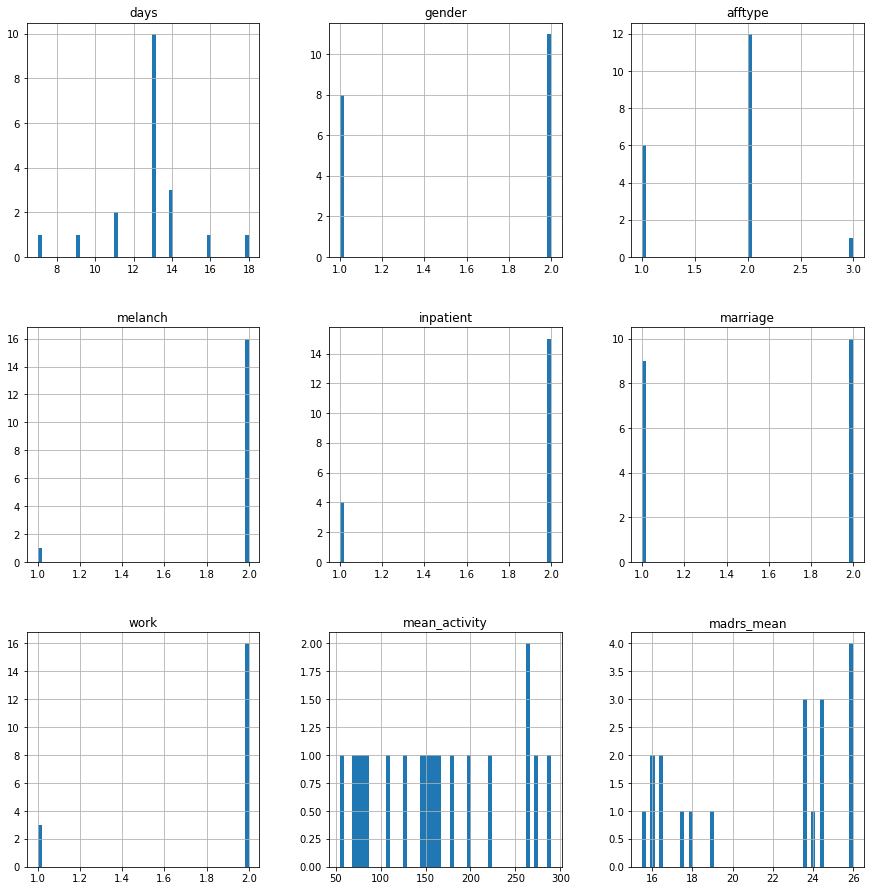

In [399]:
# We plot data as histograms for visualization
condition.hist(bins=50,figsize=(15,7))
plt.subplots_adjust(top=1.8) # adds padding between title and plot
plt.show()

### Handling Null Values

In [400]:
condition = condition.fillna(method="ffill")

In [401]:
condition.isnull().sum()

number           0
days             0
gender           0
age              0
afftype          0
melanch          0
inpatient        0
edu              0
marriage         0
work             0
mean_activity    0
madrs_mean       0
dtype: int64

## Handling Categorical Attributes



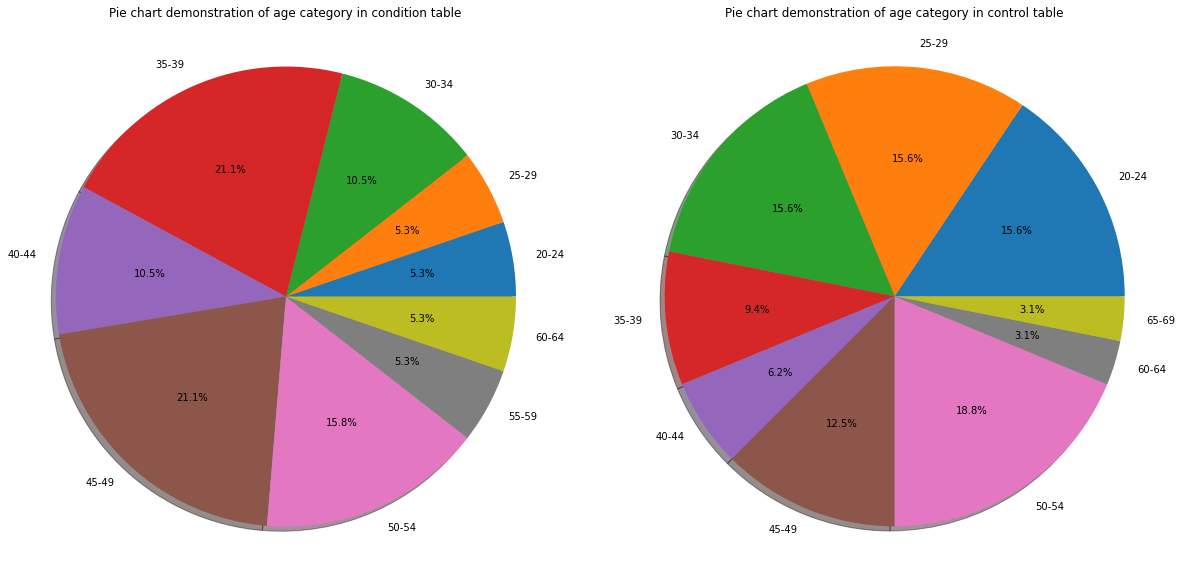

In [402]:
# Pie chart demonstration of the age column in both condition and control tables
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

axes[0].title.set_text("Pie chart demonstration of age category in condition table")
labels = condition['age'].astype('category').cat.categories.tolist()
counts =  condition['age'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
axes[0].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
axes[0].axis('equal')

# ------------------------------------------------------------------------------------------------

axes[1].title.set_text("Pie chart demonstration of age category in control table")
labels = control['age'].astype('category').cat.categories.tolist()
counts =  control['age'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
axes[1].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
axes[1].axis('equal')


plt.show()

In [403]:
replace_map = {'age': {'20-24': 0, '25-29': 1, '30-34': 2, '35-39': 3, '40-44': 4, '45-49': 5, 
                      '50-54': 6, '55-59': 7, '60-64': 8, '65-69': 9}}

In [404]:
condition.replace(replace_map, inplace=True)
condition.head()

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,mean_activity,madrs_mean
0,condition_1,11,2,3,2.0,2.0,2.0,6-10,1.0,2.0,146.948030,19.0
1,condition_2,18,2,4,1.0,2.0,2.0,6-10,2.0,2.0,289.647228,17.5
2,condition_3,13,1,5,2.0,2.0,2.0,6-10,2.0,2.0,129.383036,24.5
3,condition_4,13,2,1,2.0,2.0,2.0,11-15,1.0,1.0,151.444846,18.0
4,condition_5,13,2,6,2.0,2.0,2.0,11-15,2.0,2.0,221.348746,26.0


In [405]:
control.replace(replace_map, inplace=True)
control.head()

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,mean_activity,madrs_mean
23,control_1,8,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.545078,NaN
24,control_2,20,1,2,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,280.409097,NaN
25,control_3,12,2,2,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,162.981229,NaN
26,control_4,13,1,1,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,93.305309,NaN
27,control_5,13,1,2,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,168.275060,NaN


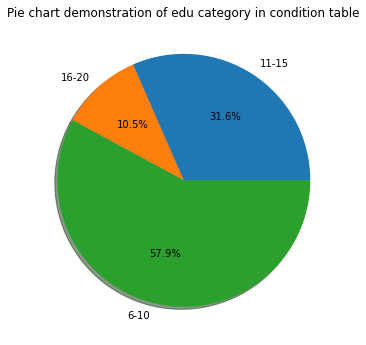

In [406]:
# Pie chart demonstration of the education column
labels = condition['edu'].astype('category').cat.categories.tolist()
counts = condition['edu'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.title.set_text("Pie chart demonstration of edu category in condition table")
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.subplots_adjust(top=1) # adds padding between title and plot
plt.show()

In [407]:
replace_map = {'edu': {'6-10': 0, '11-15': 1, '16-20': 2}}

In [408]:
condition.replace(replace_map, inplace=True)
condition.head()

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,mean_activity,madrs_mean
0,condition_1,11,2,3,2.0,2.0,2.0,0,1.0,2.0,146.948030,19.0
1,condition_2,18,2,4,1.0,2.0,2.0,0,2.0,2.0,289.647228,17.5
2,condition_3,13,1,5,2.0,2.0,2.0,0,2.0,2.0,129.383036,24.5
3,condition_4,13,2,1,2.0,2.0,2.0,1,1.0,1.0,151.444846,18.0
4,condition_5,13,2,6,2.0,2.0,2.0,1,2.0,2.0,221.348746,26.0


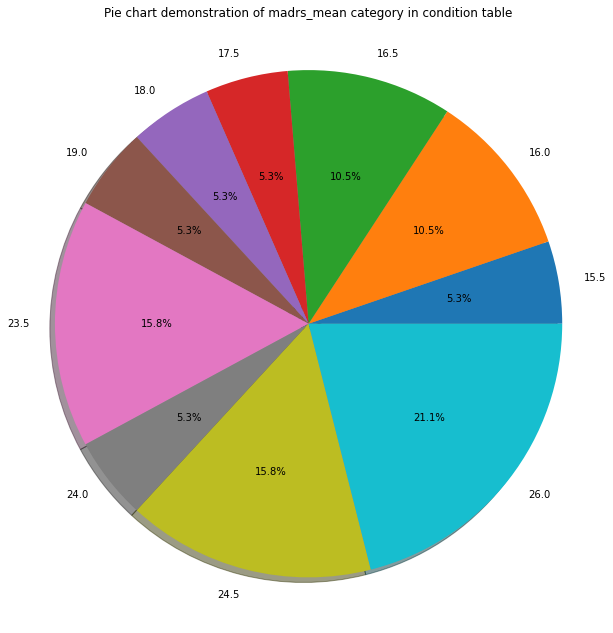

In [409]:
# Pie chart demonstration of the madrs mean column
labels = condition['madrs_mean'].astype('category').cat.categories.tolist()
counts = condition['madrs_mean'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]

fig1, ax1 = plt.subplots(figsize=(10,5))
ax1.title.set_text("Pie chart demonstration of madrs_mean category in condition table")
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.subplots_adjust(top=1.8) # adds padding between title and plot
plt.show()

__We will categorize  madrs scores by this metric;__

- 0 to 6   –-> normal /symptom absent
- 7 to 19  –-> mild depression
- 20 to 34  –-> moderate depression
- 34 to 60  –-> severe depression

In [410]:
condition['madrs_mean'] = pd.cut(x=condition['madrs_mean'],
                             bins=[0, 6, 19, 34, 60],
                             labels=['normal', 'mild_depression', 'moderate_depression', 'severe_depression'])
  

In [411]:
condition.head()

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,mean_activity,madrs_mean
0,condition_1,11,2,3,2.0,2.0,2.0,0,1.0,2.0,146.948030,mild_depression
1,condition_2,18,2,4,1.0,2.0,2.0,0,2.0,2.0,289.647228,mild_depression
2,condition_3,13,1,5,2.0,2.0,2.0,0,2.0,2.0,129.383036,moderate_depression
3,condition_4,13,2,1,2.0,2.0,2.0,1,1.0,1.0,151.444846,mild_depression
4,condition_5,13,2,6,2.0,2.0,2.0,1,2.0,2.0,221.348746,moderate_depression


In [412]:
replace_map = {'madrs_mean': {'normal': 0, 'mild_depression': 1, 'moderate_depression': 2, 'severe_depression': 3}}

In [413]:
condition.replace(replace_map, inplace=True)
condition.head()

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,mean_activity,madrs_mean
0,condition_1,11,2,3,2.0,2.0,2.0,0,1.0,2.0,146.948030,1
1,condition_2,18,2,4,1.0,2.0,2.0,0,2.0,2.0,289.647228,1
2,condition_3,13,1,5,2.0,2.0,2.0,0,2.0,2.0,129.383036,2
3,condition_4,13,2,1,2.0,2.0,2.0,1,1.0,1.0,151.444846,1
4,condition_5,13,2,6,2.0,2.0,2.0,1,2.0,2.0,221.348746,2


<AxesSubplot:>

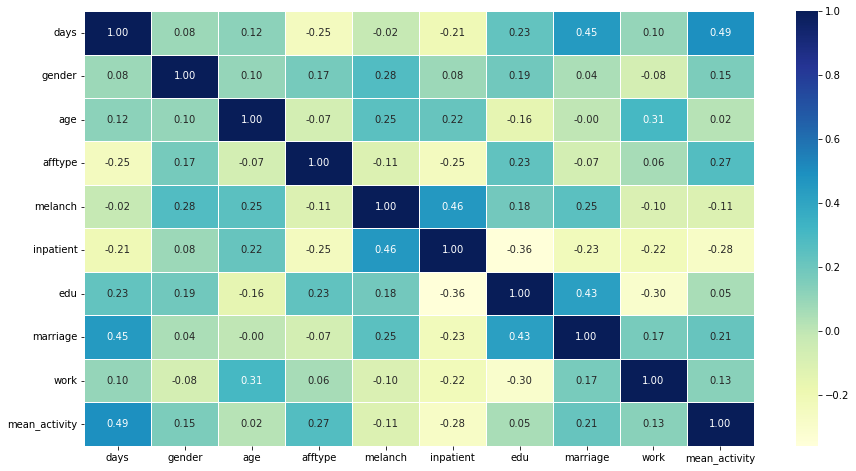

In [414]:
import seaborn as sns
from matplotlib import rcParams # For changing figure size

corr = condition.corr()
rcParams['figure.figsize'] = 15,8 # set figure size here
sns.heatmap(corr, linewidths=.5, cmap = 'YlGnBu', annot = True, fmt='.2f')

In [415]:
condition.isnull().sum() # we don't have any null values after we prepare the data

number           0
days             0
gender           0
age              0
afftype          0
melanch          0
inpatient        0
edu              0
marriage         0
work             0
mean_activity    0
madrs_mean       0
dtype: int64

Before we get into model selection part we will normalize our data. As you can see mean_activity has different scale than other attributes and it can effect our models learning speed and accuracy. After normalize the data, we can split data into its attributes and labels.

In [434]:
from sklearn.preprocessing import Normalizer
nr = Normalizer(copy=False)

# Dividing dataset into attributes and label sets
X = condition.drop(['number','madrs_mean'], axis=1) # attributes
X = nr.fit_transform(X) # normalizing the data
y = condition[['madrs_mean']] # labels
y = y.squeeze()

# Selecting Model

After splitting our dataset we have to select model, histogram graphs showed us that our attributes has discrete values. In that case we should use tree based algorithms for getting better results. I preffered not divide dataset into train, validation and test. Since dataset is small fine tuning hyper parameter in training set will not be big problem.


In [438]:
from sklearn.model_selection import train_test_split


# Split dataset as test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [439]:
import time
from sklearn.ensemble import RandomForestRegressor

time_start = time.time()

# Training model
regressor = RandomForestRegressor(n_estimators = 100, max_features = 0.5, random_state = 123)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

time_end = time.time() # Estimating running time of the model
print(f'Run time : {time_end - time_start}')

Run time : 0.06390595436096191


In [440]:
from sklearn import metrics

#R2 score before optimization
print('Training score: ', regressor.score(X_train, y_train))
print('Testing score:  ', regressor.score(X_test, y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Training score:  0.8446111111111112
Testing score:   0.38170000000000015
Root Mean Squared Error: 0.39316027266243464


# Analyizing the Results

Eventough we applied different statistic test in this project, our model didn't trained well and we experienced underfitting problem. The reason is that we do not have enough rows to train our model, the number of patients in the condition group is not enough to evaluate accurate results. In addition, the number of features is not sufficient and the relationship with other features is relatively low. Another reason may be that the interpretation of the data is incorrect, in which case you can warn me about areas where I lack knowledge and help me improve my skills.

# References

- [1] https://www.healthline.com/health/bipolar-disorder/bipolar-1-vs-bipolar-2#bipolar-vs-bipolar-
- [2] https://guides.clarahealth.com/what-is-unipolar-depression/
- [3] https://en.wikipedia.org/wiki/Montgomery%E2%80%93%C3%85sberg_Depression_Rating_Scale
- [4] https://www.statology.org/dickey-fuller-test-python/